In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Đọc dữ liệu
df = pd.read_csv('../data/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [124]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [125]:
print(df.isnull().sum())  # Kiểm tra giá trị thiếu

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [126]:
# Biến mục tiêu là Calories_Burned
y = df['Calories_Burned']

# Đặc trưng đầu vào: bỏ Calories_Burned và BMI (BMI phụ thuộc chiều cao, cân nặng)
X = df.drop(['Calories_Burned', 'BMI'], axis=1)


In [127]:
# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [128]:
# Xác định các cột dạng số và dạng phân loại
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [129]:
# Tiền xử lý: chuẩn hóa số, mã hóa one-hot cho phân loại
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [130]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [131]:
# Training Linear Regression model
lg = LinearRegression()
lg.fit(X_train, y_train)

LinearRegression()

In [132]:
# Dự đoán
y_pred_lr = lg.predict(X_test)

In [133]:
# Đánh giá
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 29.693973693057483
RMSE: 39.392452852240964
R2: 0.9807794872906253


In [134]:
# Chọn k=5
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [135]:
y_pred_knn = knn.predict(X_test)

In [136]:
# Đánh giá
print("KNN Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print("RMSE:", rmse)
print("R2:", r2_score(y_test, y_pred_knn))

KNN Regression:
MAE: 87.04098360655738
RMSE: 112.11134541379745
R2: 0.8443181264622609


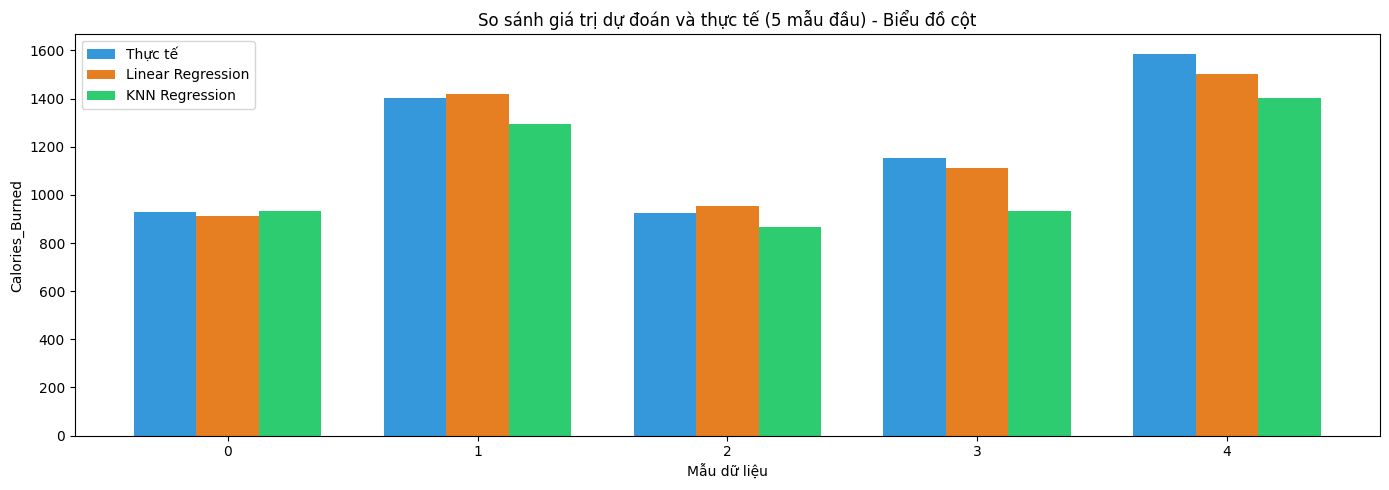

In [137]:
n = 5
indices = np.arange(n)
bar_width = 0.25

plt.figure(figsize=(14, 5))
plt.bar(indices - bar_width, y_test.values[:n], width=bar_width, label='Thực tế', color='#3498db')
plt.bar(indices, y_pred_lr[:n], width=bar_width, label='Linear Regression', color='#e67e22')
plt.bar(indices + bar_width, y_pred_knn[:n], width=bar_width, label='KNN Regression', color='#2ecc71')

plt.xlabel('Mẫu dữ liệu')
plt.ylabel('Calories_Burned')
plt.title('So sánh giá trị dự đoán và thực tế (5 mẫu đầu) - Biểu đồ cột')
plt.legend()
plt.tight_layout()
plt.show()

In [138]:
# So sánh lượng calories tiêu hao giữa các loại bài tập và giới tính
grouped = df.groupby(['Workout_Type', 'Gender'])['Calories_Burned'].mean().reset_index()
grouped['Calories_Burned'] = grouped['Calories_Burned'].round(2)

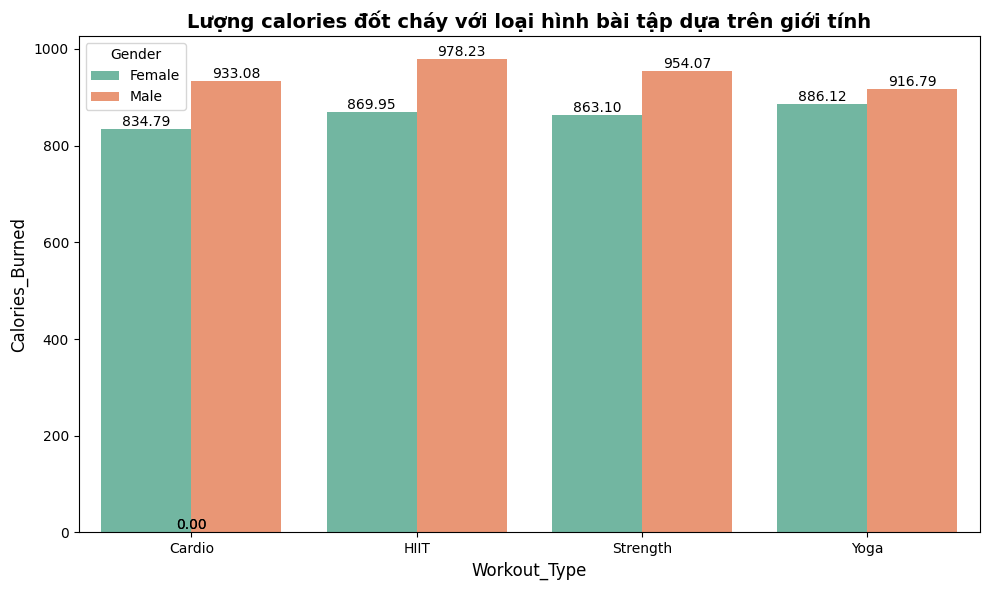

In [139]:
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=grouped,
    x='Workout_Type',
    y='Calories_Burned',
    hue='Gender',
    palette='Set2'
)
# Hiển thị giá trị trên đầu cột
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Lượng calories đốt cháy với loại hình bài tập dựa trên giới tính', fontsize=14, fontweight='bold')
plt.xlabel('Workout_Type', fontsize=12)
plt.ylabel('Calories_Burned', fontsize=12)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

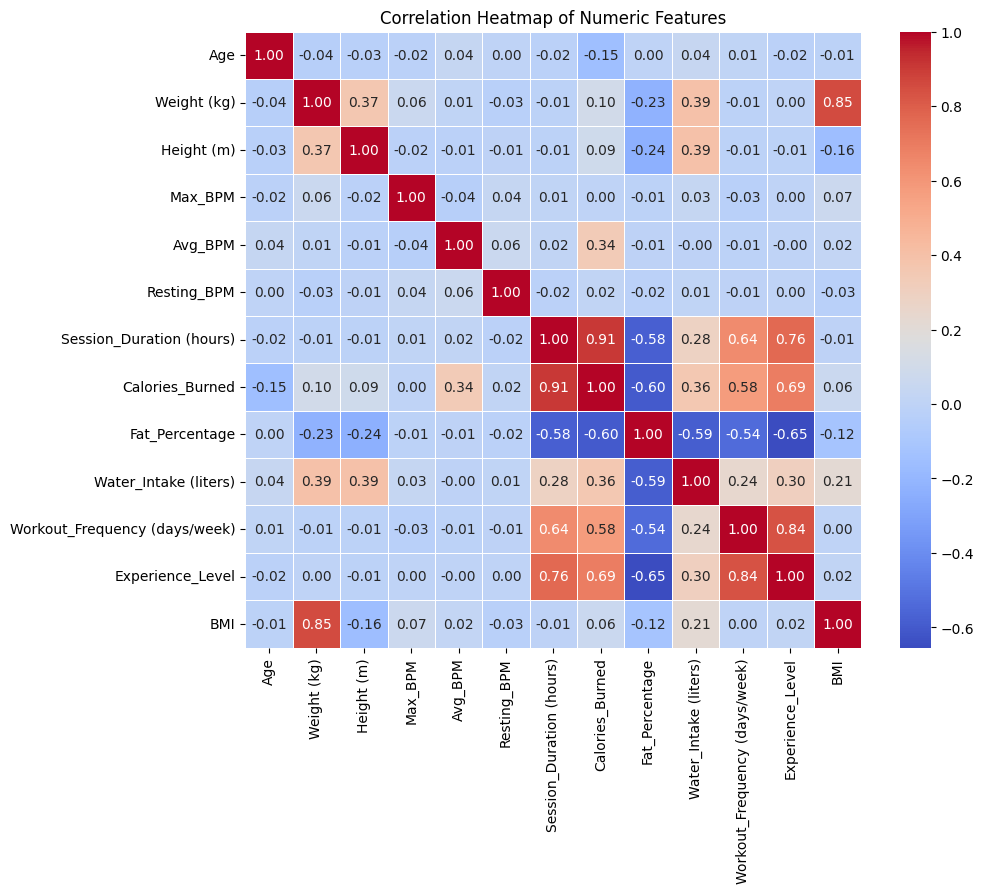

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các cột số để tính toán ma trận tương quan
numeric_columns = df.select_dtypes(include='number')

# Tính toán ma trận tương quan
corr_matrix = numeric_columns.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


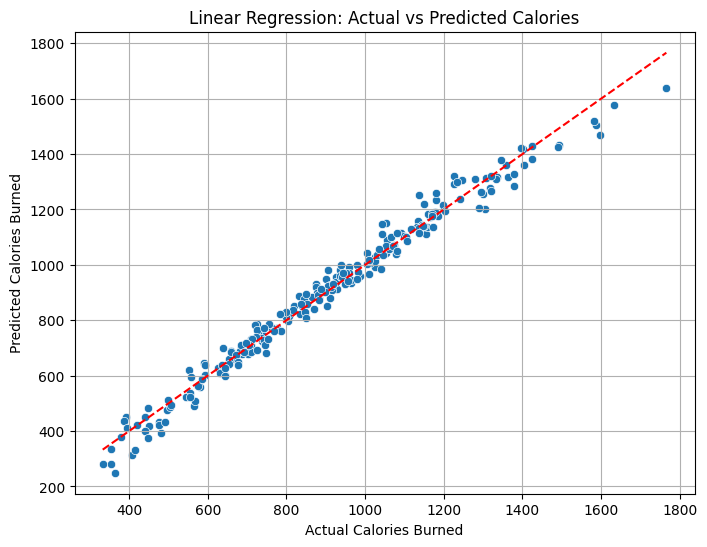

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường y = x
plt.title('Linear Regression: Actual vs Predicted Calories')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.grid(True)
plt.show()


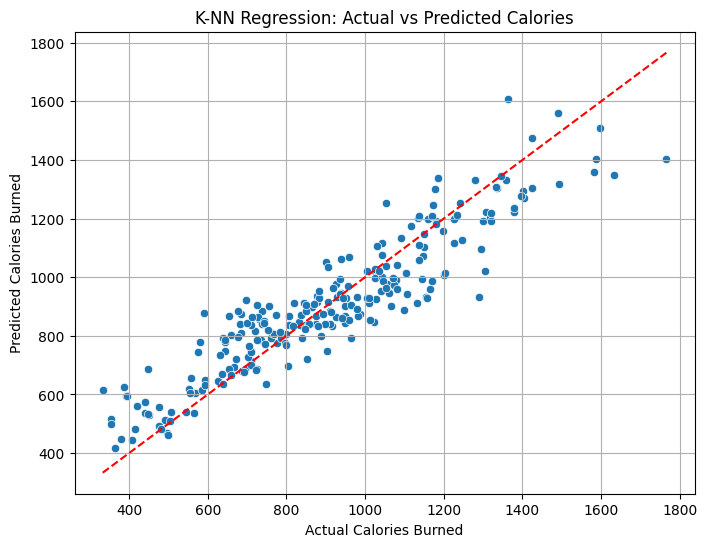

In [142]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_knn)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Đường y = x
plt.title('K-NN Regression: Actual vs Predicted Calories')
plt.xlabel('Actual Calories Burned')
plt.ylabel('Predicted Calories Burned')
plt.grid(True)
plt.show()


In [143]:
import pickle
with open('../models/linear.pkl', 'wb') as model_file:
    pickle.dump(lg, model_file)

In [144]:
with open('../models/knn.pkl', 'wb') as model_file:
    pickle.dump(knn, model_file)

In [145]:
with open('../models/preprocessor.pkl', 'wb') as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)